In [1]:
#################################
#    Title: NLP technique applied on NSF grant titles and abstract
#    Author: Asif Kamal Turzo
#    Date: 12/02/2022
#    Code version: 1.0
#    For some task visualization, online source support
#    was used, specially from the online blog below:
#   'https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0'
#    accessed {12/07/2022}
#################################

import pandas as pd
import os
import csv

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\turzo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#load dataset
input_fd = open('dataset_nlp.csv', encoding="utf8", errors='ignore') 
dataset=pd.read_csv(input_fd)

In [3]:
###################### data preprocessing

# Remove punctuation
dataset['AwardTitle_clean'] = dataset['AwardTitle'].str.replace('[^\w\s]',' ')

# Convert the titles to lowercase
dataset['AwardTitle_clean'] = dataset['AwardTitle_clean'].str.lower()

print(dataset['AwardTitle_clean'].head())

c:\users\turzo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


0    collaborative research  spatiotemporal observa...
1    the role of interstitial air layer in drop imp...
2    cns core  small  towards timing predictable au...
3    gem  modeling and analysis of extreme geomagne...
4    rapid  critical data collection from a flash f...
Name: AwardTitle_clean, dtype: object


In [4]:
# Join the different processed titles together.
long_string=dataset['AwardTitle_clean'].str.cat(sep=' ')

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
image=wordcloud.to_image()
image.save("word_cloud.png")

In [5]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'th', 'us', 'ii', 'fy', 'sbir'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = dataset.AwardTitle_clean.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:2][0][:20])

['collaborative', 'research', 'spatiotemporal', 'observations', 'demise', 'ice', 'sheet', 'paleo', 'perspectives', 'baffin', 'bay', 'west', 'greenland']


In [6]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


In [7]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.029*"research" + 0.027*"collaborative" + 0.011*"career" + '
  '0.007*"structure" + 0.007*"learning" + 0.007*"dynamics" + 0.006*"analysis" '
  '+ 0.006*"data" + 0.005*"carbon" + 0.004*"eager"'),
 (1,
  '0.038*"research" + 0.032*"collaborative" + 0.014*"small" + 0.014*"systems" '
  '+ 0.011*"career" + 0.010*"networks" + 0.009*"energy" + 0.006*"information" '
  '+ 0.005*"design" + 0.005*"wireless"'),
 (2,
  '0.037*"research" + 0.027*"collaborative" + 0.009*"new" + 0.008*"summer" + '
  '0.008*"workshop" + 0.007*"development" + 0.007*"nsf" + 0.007*"east" + '
  '0.006*"asia" + 0.006*"theory"'),
 (3,
  '0.038*"research" + 0.036*"collaborative" + 0.012*"data" + 0.010*"modeling" '
  '+ 0.009*"systems" + 0.009*"models" + 0.007*"analysis" + 0.007*"ocean" + '
  '0.005*"learning" + 0.005*"multi"'),
 (4,
  '0.020*"phase" + 0.010*"career" + 0.008*"research" + 0.008*"collaborative" + '
  '0.008*"studies" + 0.007*"using" + 0.007*"quantum" + 0.007*"applications" + '
  '0.006*"dynamics" + 0.006

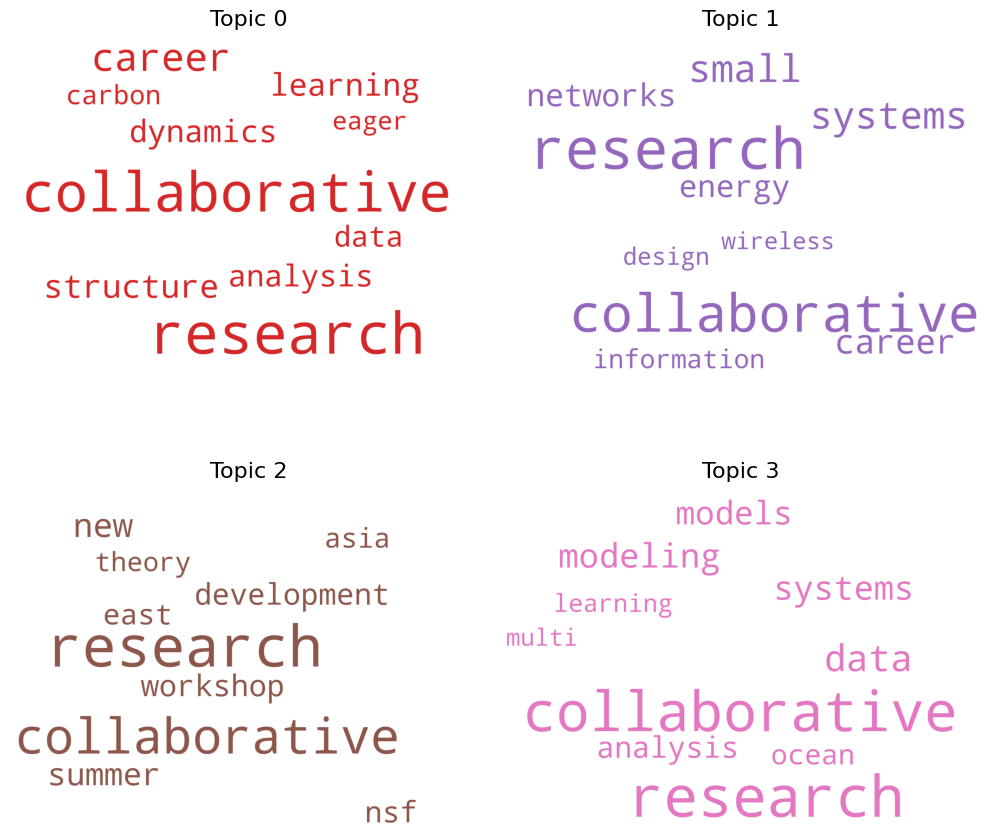

In [9]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i+3],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig1 = plt.gcf()
plt.show()
fig1.savefig('topic_wordcloud.png')

c:\users\turzo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\turzo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\turzo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\turzo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


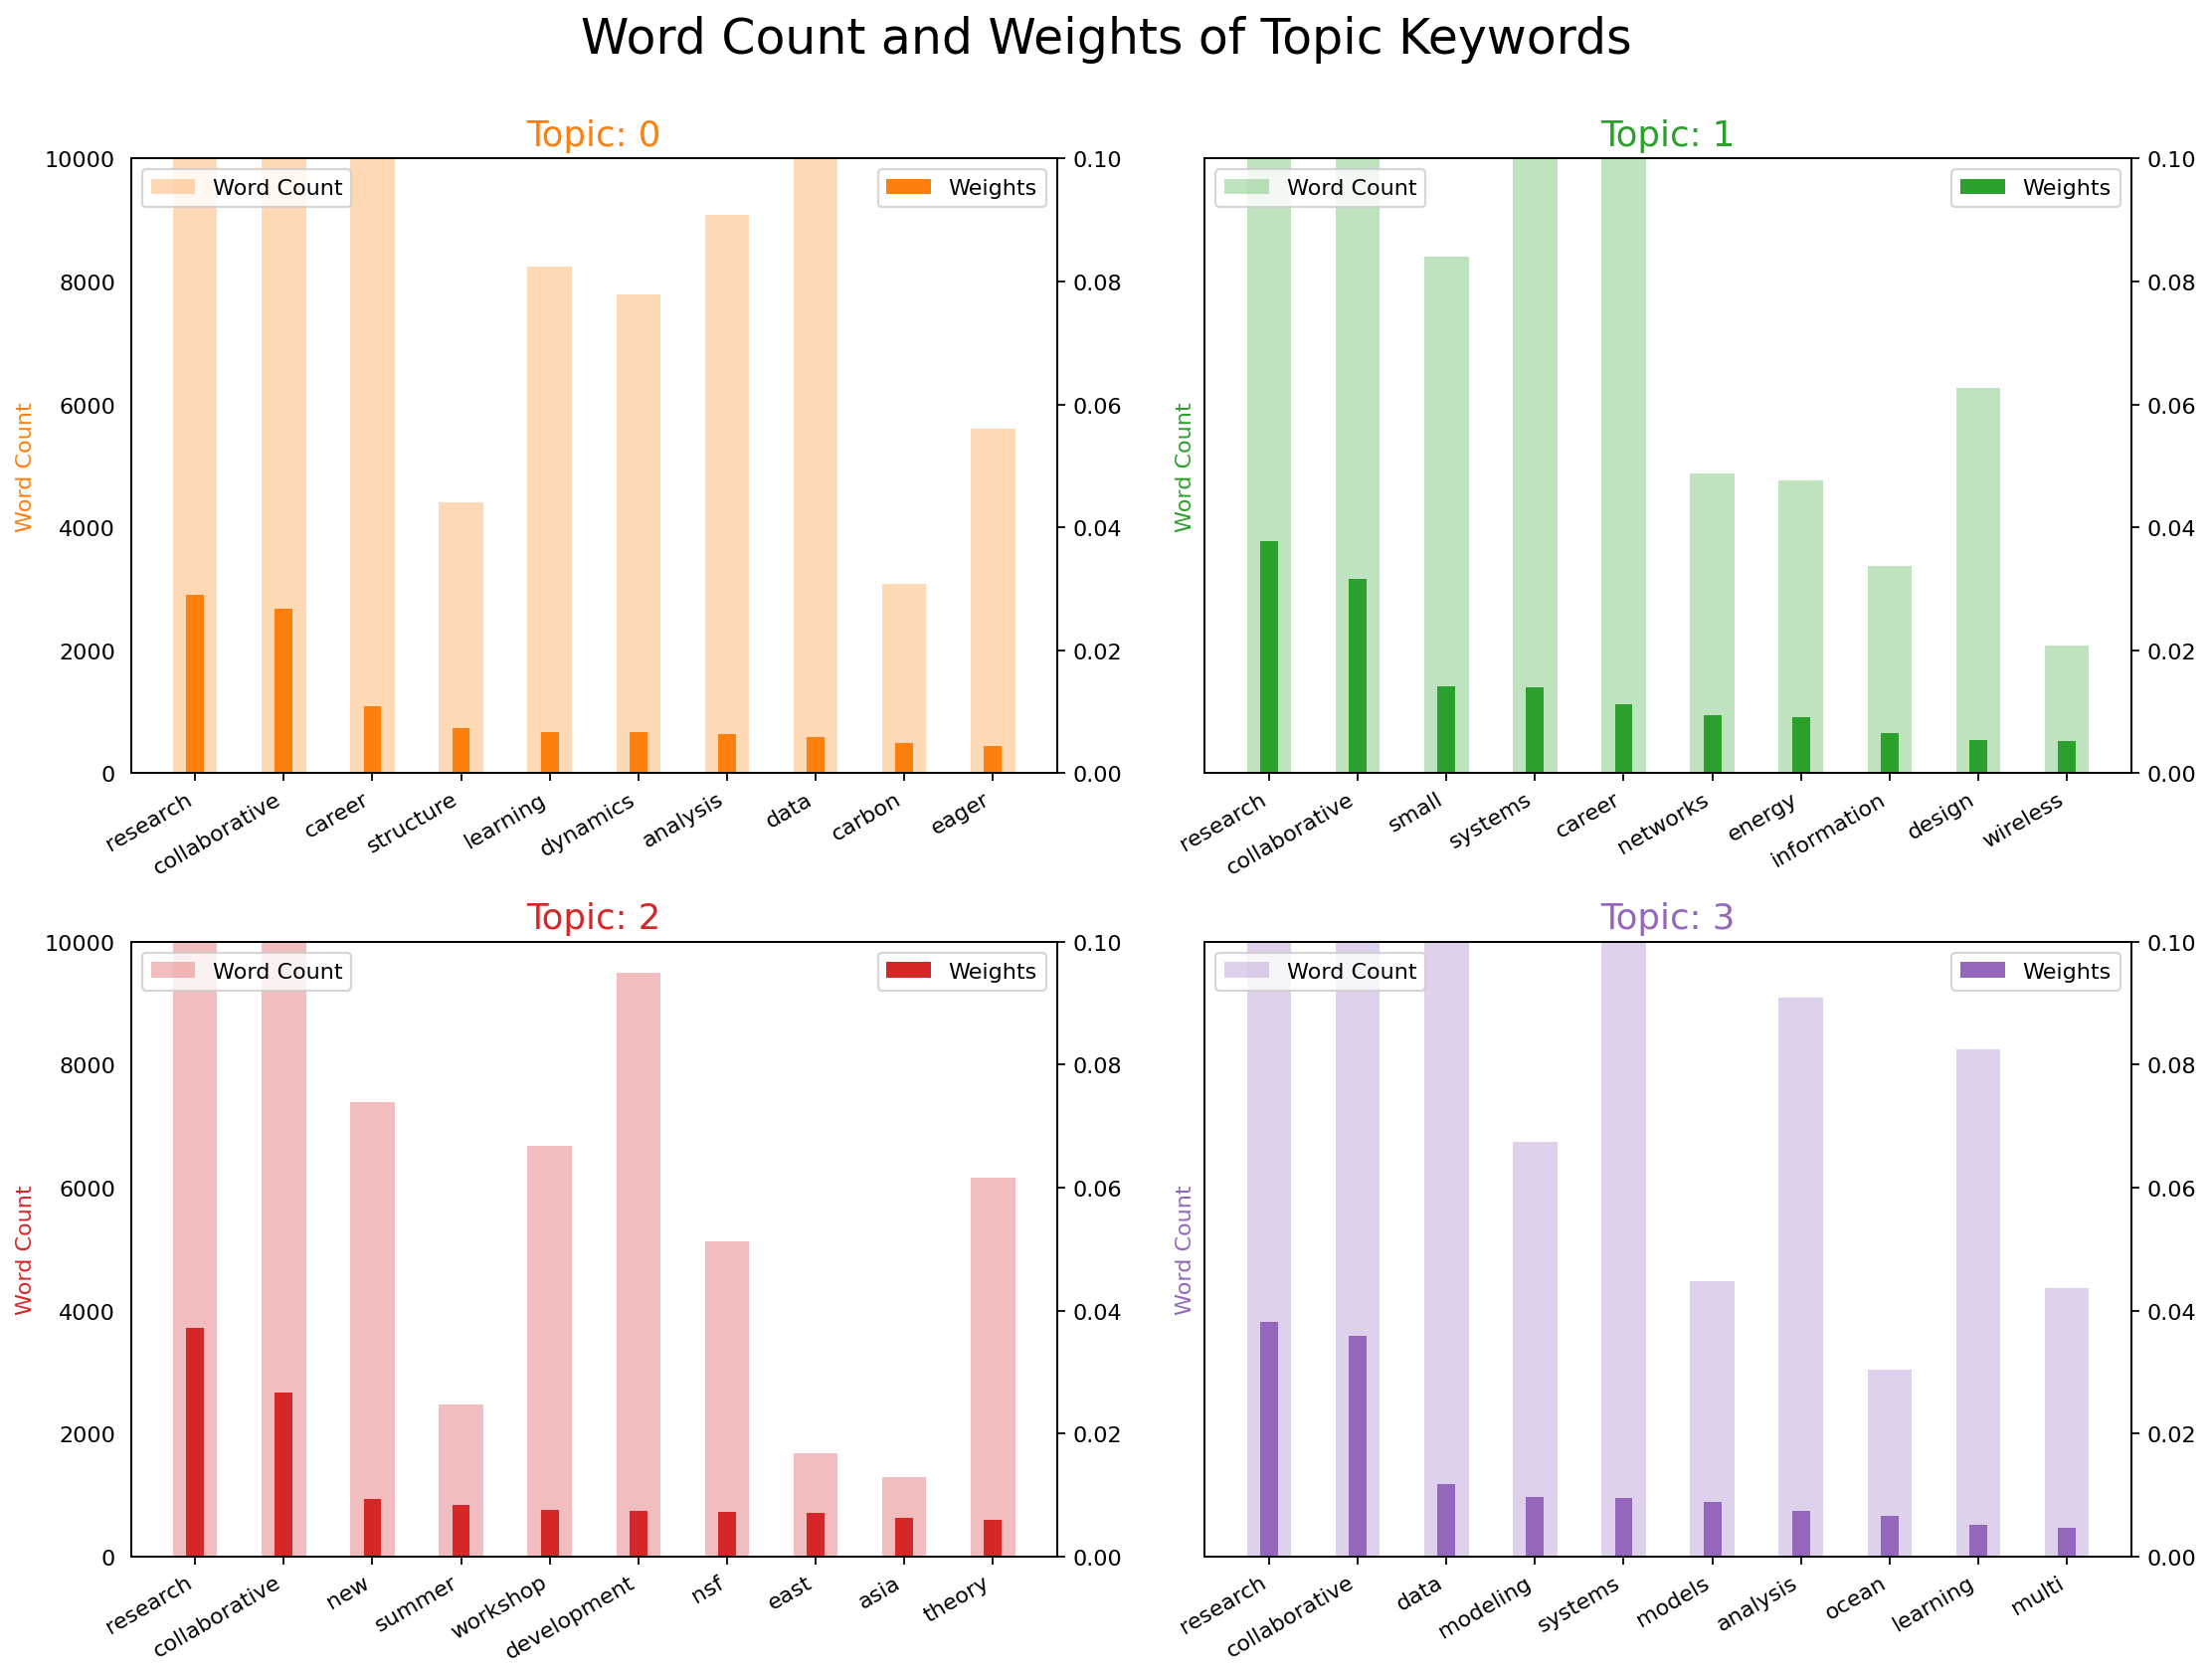

In [10]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(14,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i+1], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i+1], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i+1])
    ax_twin.set_ylim(0, 0.10); ax.set_ylim(0, 10000)
    ax.set_title('Topic: ' + str(i), color=cols[i+1], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Weights of Topic Keywords', fontsize=22, y=1.05)    
fig2 = plt.gcf()
plt.show()
fig2.savefig('topic_word_frequency.png')

In [11]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis
pyLDAvis.save_html(vis,"title_visualiation.html")

c:\users\turzo\appdata\local\programs\python\python37\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
c:\users\turzo\appdata\local\programs\python\python37\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [12]:
dataset_abstract = dataset.sample(n = 50000)

dataset_abstract['AbstractNarration'] = dataset_abstract['AbstractNarration'].str.replace('[^\w\s]',' ')

# Convert the titles to lowercase
dataset_abstract['AbstractNarration'] = dataset_abstract['AbstractNarration'].str.lower()

print(dataset_abstract['AbstractNarration'].head())

<>:3: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
C:\Users\turzo\AppData\Local\Temp\ipykernel_15884\541562852.py:3: DeprecationWarning: invalid escape sequence \w
  dataset_abstract['AbstractNarration'] = dataset_abstract['AbstractNarration'].str.replace('[^\w\s]',' ')
c:\users\turzo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


20169     the recent surge in induced seismicity in the ...
117054    the objective of this research is to investiga...
104123    simple  the sub ice investigation of marine an...
182440    this project involves research on empirical me...
268579    this proposed research focuses on the material...
Name: AbstractNarration, dtype: object


In [13]:
stop_words.extend(['it', 'gt', 'br', 'lt'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data_abs = dataset_abstract.AbstractNarration.values.tolist()
data_words_abs = list(sent_to_words(data_abs))

# remove stop words
data_words_abs = remove_stopwords(data_words_abs)
print(data_words_abs[:2][0][:20])

['recent', 'surge', 'induced', 'seismicity', 'midwestern', 'united', 'states', 'oklahoma', 'catapulted', 'past', 'california', 'seismicity', 'rate', 'created', 'controversy', 'captured', 'attention', 'general', 'public', 'influenced']


In [14]:
# Create Dictionary
id2word_abs = corpora.Dictionary(data_words_abs)
# Create Corpus
texts_abs = data_words_abs
# Term Document Frequency
corpus_abs = [id2word_abs.doc2bow(text) for text in texts_abs]
# View
print(corpus_abs[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 4), (28, 5), (29, 1)]


In [15]:
num_topics = 10
# Build LDA model
lda_model_abs = gensim.models.LdaMulticore(corpus=corpus_abs,
                                       id2word=id2word_abs,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_abs.print_topics())
doc_lda_abs = lda_model_abs[corpus_abs]

[(0,
  '0.009*"project" + 0.008*"research" + 0.006*"new" + 0.006*"students" + '
  '0.005*"systems" + 0.004*"using" + 0.003*"also" + 0.003*"materials" + '
  '0.003*"study" + 0.003*"time"'),
 (1,
  '0.014*"research" + 0.012*"project" + 0.007*"students" + 0.004*"data" + '
  '0.004*"systems" + 0.004*"support" + 0.004*"science" + 0.004*"high" + '
  '0.003*"development" + 0.003*"also"'),
 (2,
  '0.012*"research" + 0.009*"project" + 0.006*"data" + 0.005*"high" + '
  '0.004*"students" + 0.004*"new" + 0.004*"systems" + 0.004*"using" + '
  '0.003*"used" + 0.003*"science"'),
 (3,
  '0.011*"research" + 0.010*"students" + 0.010*"project" + 0.006*"science" + '
  '0.006*"stem" + 0.006*"data" + 0.006*"learning" + 0.004*"support" + '
  '0.004*"education" + 0.004*"development"'),
 (4,
  '0.010*"data" + 0.008*"research" + 0.008*"project" + 0.005*"study" + '
  '0.004*"using" + 0.004*"new" + 0.003*"provide" + 0.003*"understanding" + '
  '0.003*"based" + 0.003*"work"'),
 (5,
  '0.013*"research" + 0.006*"pro

In [16]:
pyLDAvis.enable_notebook()
vis_abs = gensimvis.prepare(lda_model_abs, corpus_abs, dictionary=lda_model_abs.id2word)
vis_abs

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.020897  0.005111       1        1  15.242755
0      0.024302  0.019403       2        1  12.999686
3     -0.033747  0.010301       3        1  12.480570
9     -0.005250 -0.015538       4        1  11.996180
2      0.002945 -0.020160       5        1   8.949976
4      0.019839 -0.004875       6        1   8.691522
5      0.001338 -0.002662       7        1   8.289144
7      0.011960  0.003192       8        1   8.220131
1     -0.002608 -0.002480       9        1   6.687736
8      0.002118  0.007707      10        1   6.442300, topic_info=         Term           Freq          Total Category  logprob  loglift
199   project   99451.000000   99451.000000  Default  30.0000  30.0000
94   research  119064.000000  119064.000000  Default  29.0000  29.0000
351      data   53669.000000   53669.000000  Default  28.0000  28.0000
882      stem   18198.000000   18198.000000  Default  27.0000  27.0000
213  students   65245.000000   65245.000000  Default  26.0000  26.0000
..        ...            ...            ...      ...      ...      ...
160      high    1670.926413   33049.379506  Topic10  -5.9941  -0.2423
351      data    1882.695554   53669.424287  Topic10  -5.8748  -0.6079
122      well    1500.621319   23181.716984  Topic10  -6.1016   0.0048
130     based    1554.480799   27868.704003  Topic10  -6.0663  -0.1441
121      used    1450.176766   22370.242538  Topic10  -6.1358   0.0062

[967 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
1017       1  0.160772  academic
1017       2  0.125064  academic
1017       3  0.298744  academic
1017       4  0.100420  academic
1017       5  0.058173  academic
...      ...       ...       ...
12842      6  0.740496  yosemite
12842      8  0.049366  yosemite
12842     10  0.049366  yosemite
36459      2  0.844928       zfc
36459      6  0.105616       zfc

[4387 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 4, 10, 3, 5, 6, 8, 2, 9])

In [17]:
pyLDAvis.save_html(vis_abs,"abstract_visualiation.html")

In [18]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_abs, corpus=corpus_abs, texts=data_words_abs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.9929,"project, research, new, students, systems, usi...","[recent, surge, induced, seismicity, midwester..."
1,1,6.0,0.9842,"research, project, students, science, universi...","[objective, research, investigate, integration..."
2,2,7.0,0.7434,"research, project, new, understanding, data, m...","[simple, sub, ice, investigation, marine, plan..."
3,3,9.0,0.9384,"research, project, data, new, students, also, ...","[project, involves, research, empirical, metho..."
4,4,8.0,0.4838,"project, research, new, students, science, und...","[proposed, research, focuses, materials, growt..."
5,5,6.0,0.6224,"research, project, students, science, universi...","[gordon, award, supports, professor, mark, gor..."
6,6,9.0,0.6650,"research, project, data, new, students, also, ...","[broad, agreement, indigent, defense, counsel,..."
7,7,5.0,0.3755,"research, project, students, new, also, progra...","[assessing, assessments, historical, philosoph..."
8,8,2.0,0.6124,"research, project, data, high, students, new, ...","[yang, yong, conventional, cell, culture, meth..."
9,9,7.0,0.7101,"research, project, new, understanding, data, m...","[goal, research, understand, large, stand, rep..."


c:\users\turzo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\turzo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\turzo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\turzo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


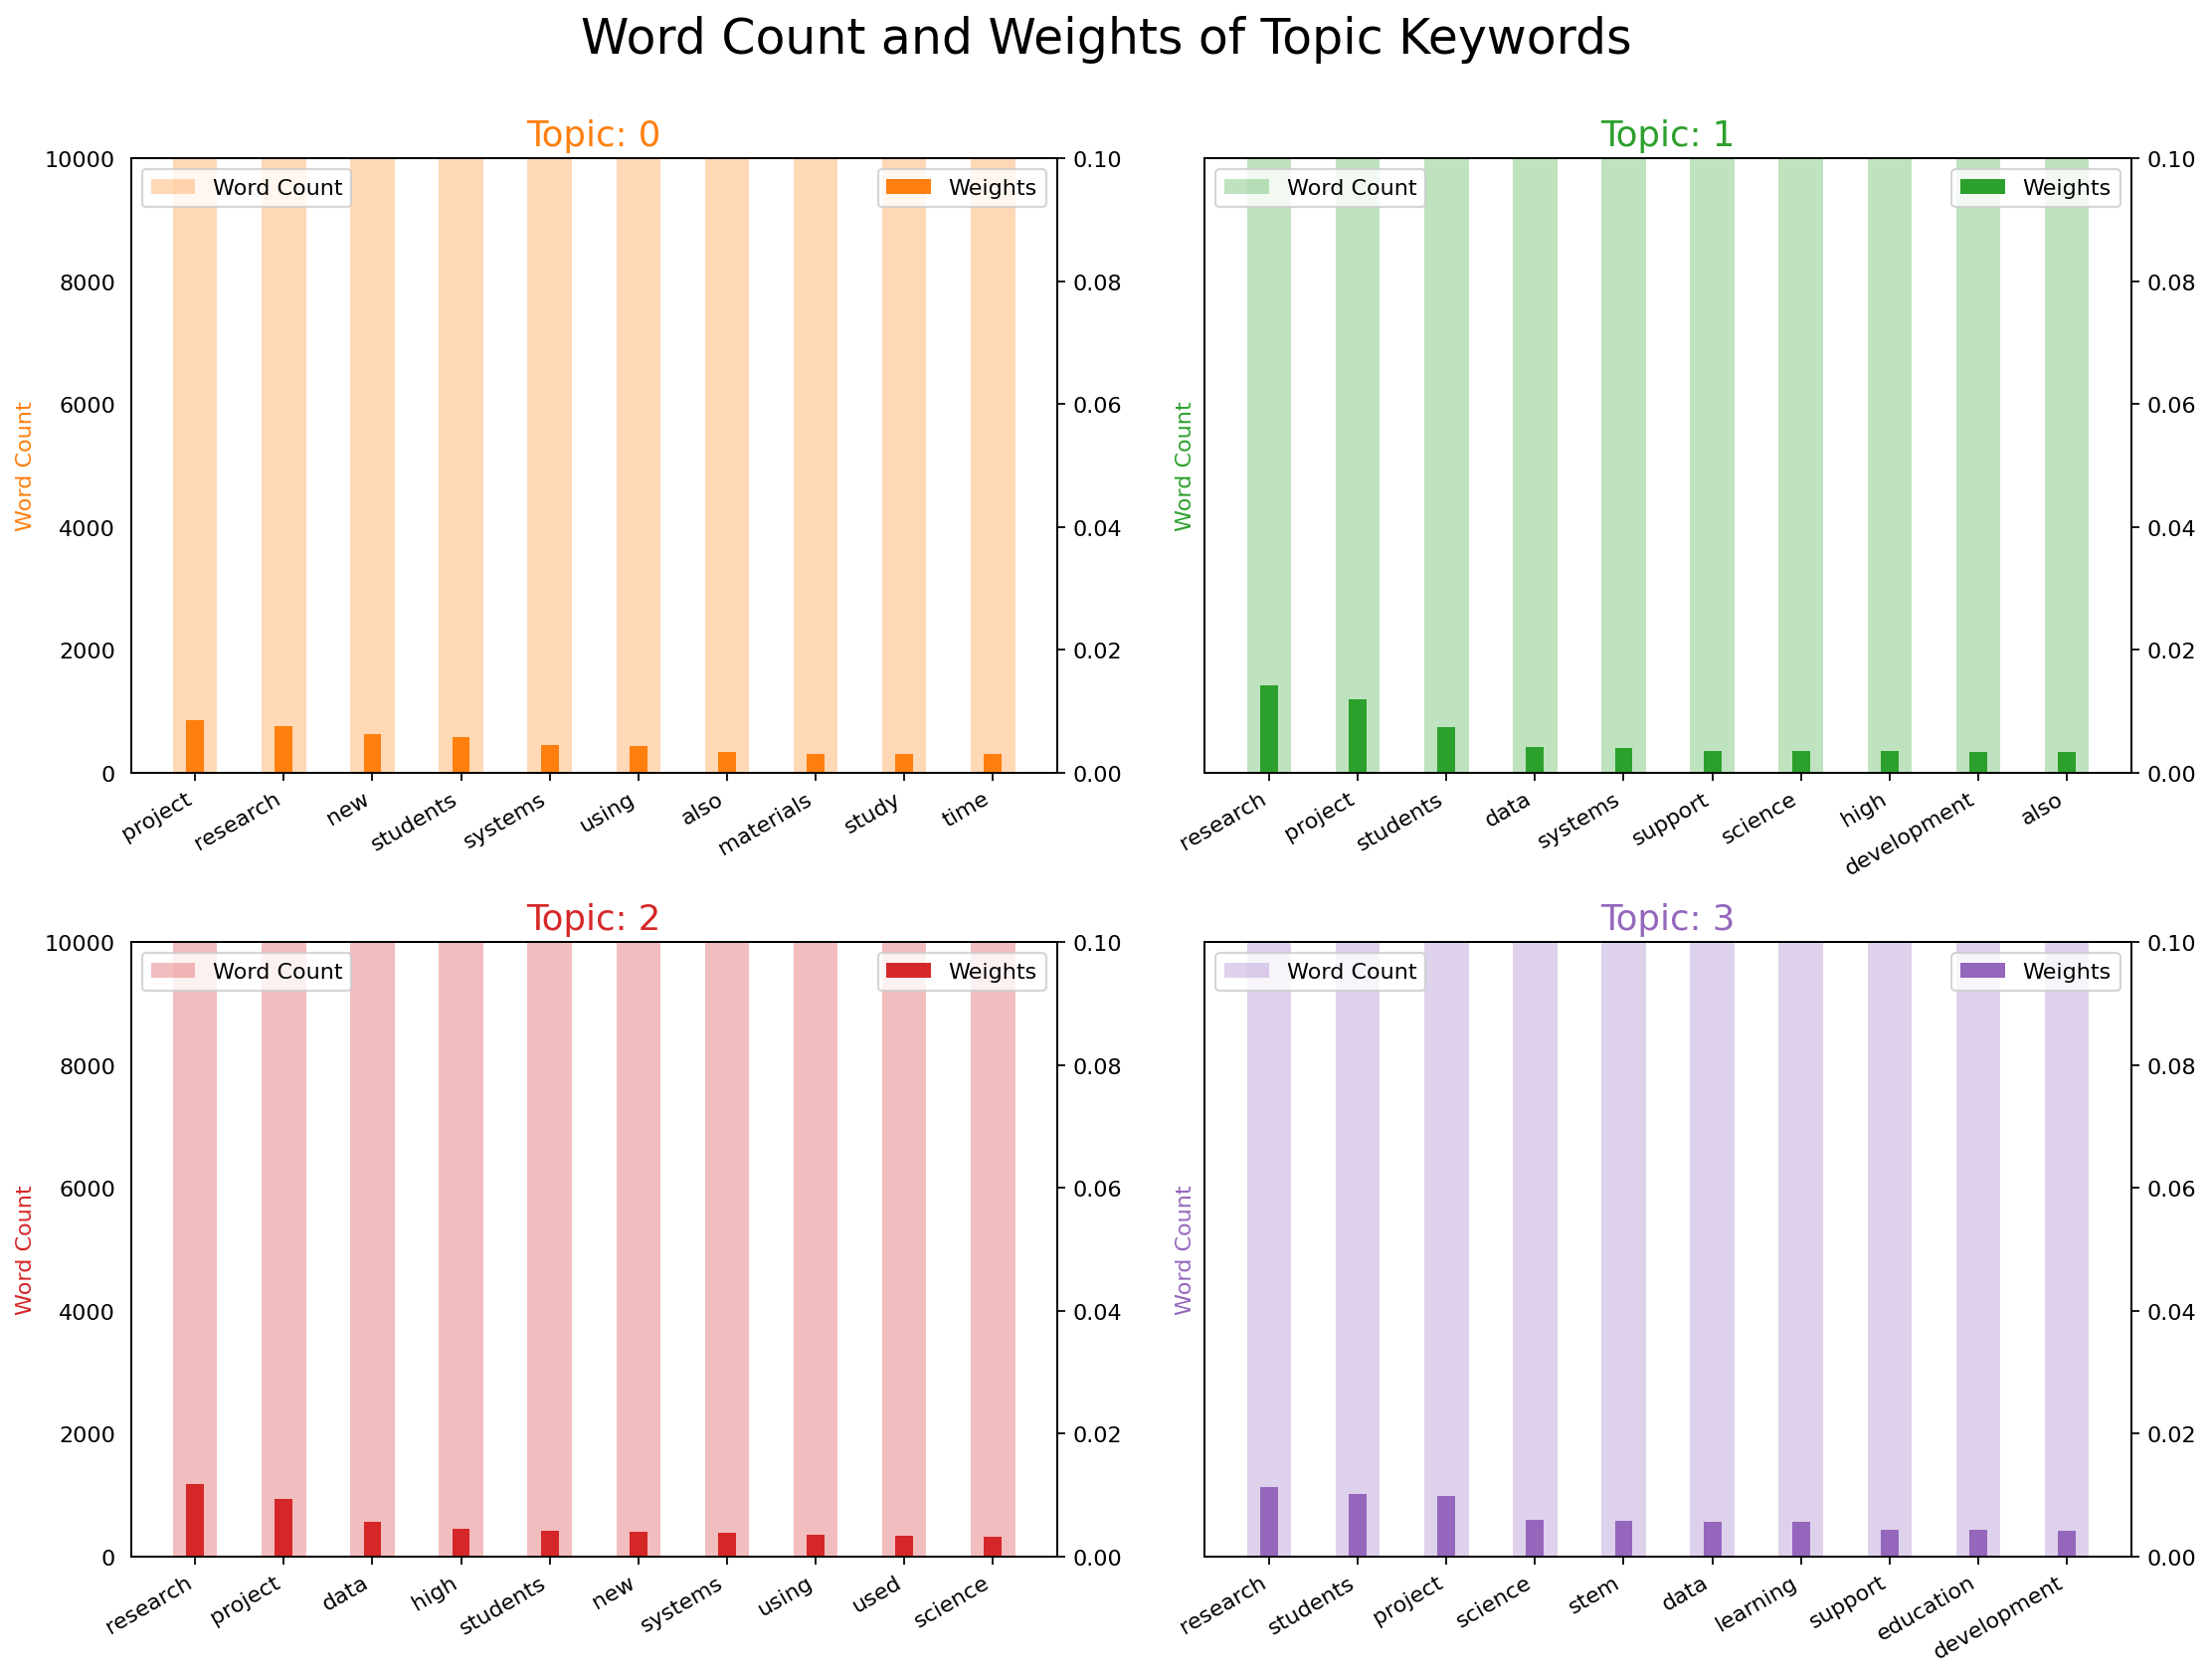

In [19]:
topics = lda_model_abs.show_topics(formatted=False)
data_flat = [w for w_list in data_words_abs for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(14,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i+1], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i+1], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i+1])
    ax_twin.set_ylim(0, 0.10); ax.set_ylim(0, 10000)
    ax.set_title('Topic: ' + str(i), color=cols[i+1], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Weights of Topic Keywords', fontsize=22, y=1.05)    
fig3 = plt.gcf()
plt.show()
fig3.savefig('abstract_word_frequency.png')